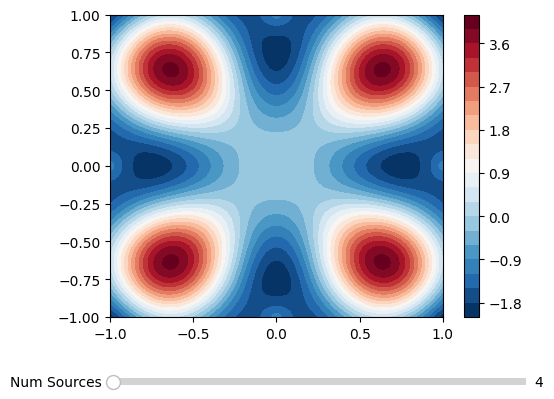

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Parameters
L = 1.0     # Side length of the square
c = 1.0     # Wave speed
f = 1.0     # Frequency of the wave
A = 1.0     # Amplitude of the wave
lambda_ = 1.0 # Wavelength
k = 2 * np.pi / lambda_  # Wave number
t = 0.0     # Time

# Function to calculate the wave displacement from a source
def wave_displacement(x, y, x0, y0, k, t):
    r = np.sqrt((x - x0)**2 + (y - y0)**2)
    return A * np.sin(2 * np.pi * f * t - k * r)

# Function to calculate and plot the interference pattern
def plot_interference(num_sources):
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.25, bottom=0.25)

    # Preparing the grid
    x = np.linspace(-L, L, 400)
    y = np.linspace(-L, L, 400)
    X, Y = np.meshgrid(x, y)

    # Create a regular polygon (circle-like distribution) for more sources
    angles = np.linspace(0, 2 * np.pi, num_sources, endpoint=False)
    positions = [(L * np.cos(angle), L * np.sin(angle)) for angle in angles]

    # Calculate superposition
    Z = np.zeros(X.shape)
    for (x0, y0) in positions:
        Z += wave_displacement(X, Y, x0, y0, k, t)

    # Find min and max values for consistent color scale
    vmin = np.min(Z)
    vmax = np.max(Z)

    # Plot
    contour = ax.contourf(X, Y, Z, 20, cmap='RdBu_r', vmin=vmin, vmax=vmax)  # Set vmin and vmax here
    cbar = plt.colorbar(contour)

    axcolor = 'lightgoldenrodyellow'
    axSources = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

    sliderSources = Slider(axSources, 'Num Sources', 1, 500, valinit=num_sources, valstep=1)

    def update(val):
        num_sources = int(sliderSources.val)
        angles = np.linspace(0, 2 * np.pi, num_sources, endpoint=False)
        positions = [(L * np.cos(angle), L * np.sin(angle)) for angle in angles]

        Z = np.zeros(X.shape)
        for (x0, y0) in positions:
            Z += wave_displacement(X, Y, x0, y0, k, t)

        # Plot with fixed color limits
        ax.clear()

        contour = ax.contourf(X, Y, Z, 20, cmap='RdBu_r', vmin=vmin, vmax=vmax)  # Set vmin and vmax here

        # This is necessary for updating
        cbar.remove()
        cbar = plt.colorbar(contour, ax=ax)

        plt.draw()

    sliderSources.on_changed(update)

    plt.show()

# Initial call to plot the interference pattern
plot_interference(4)